<a href="https://colab.research.google.com/github/mangare5/Portfolio_IA/blob/main/Clustering_Classifier_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptado de:
# https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f

In [ ]:
import pandas as pd
import torch
import numpy as np
import time
from matplotlib import pyplot as plt

use_cuda = torch.cuda.is_available()
dtype = torch.float32 if use_cuda else torch.float64

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    %tensorflow_version 1.x

    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1Ttj03tzvYaPWq-M1ZfxxsAE1U7dTWoJk',
                                        dest_path='./bbc-text.csv')

TensorFlow 1.x selected.


Data Exploration

In [ ]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
print(df['text'][0])

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

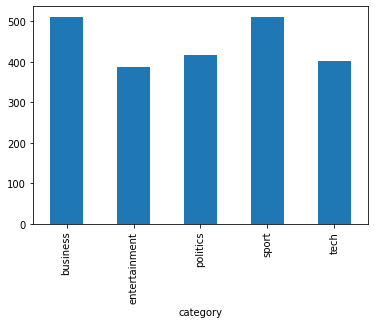

In [ ]:
df.groupby(['category']).size().plot.bar()

In [ ]:
clean_df = df.copy()
class_column = 'category'
classes_names = df[class_column].unique()
attribute_columns = list(df.columns)
attribute_columns.remove(class_column)

print(class_column)
print(classes_names)
print(attribute_columns)
print("Number of sentences: {}".format(len(attribute_columns)))

category
['tech' 'business' 'sport' 'entertainment' 'politics']
['text']
Number of sentences: 1


In [ ]:
y = np.array(df[class_column])
X = np.array(clean_df[attribute_columns])

In [ ]:
X[1]

array(['worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief 

In [ ]:
X.shape

(2225, 1)

In [ ]:
df_train, df_val, df_test = np.split(clean_df.sample(frac=1, random_state=42), #With Dataframe.sample we shuffle the dataframe entries in order to mix the domains
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

1780 222 223


In [ ]:
y_train = df_train['category']
y_val = df_val['category']
y_test = df_test['category']

In [ ]:
del df_train['category']
del df_val['category']
del df_test['category']

In [ ]:
print(df_train)

                                                   text
414   brown and blair face new rift claims for the u...
420   small firms  hit by rising costs  rising fuel ...
1644  spirit awards hail sideways the comedy sideway...
416   microsoft releases patches microsoft has warne...
1232  arsenal through on penalties arsenal win 4-2 o...
...                                                 ...
801   ireland 19-13 england ireland consigned englan...
1774  warning over tsunami aid website net users are...
512   digital guru floats sub-$100 pc nicholas negro...
633   gallery unveils interactive tree a christmas t...
1789  us tv special for tsunami relief a us televisi...

[1780 rows x 1 columns]


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 3.3 MB/s 
     |████████████████████████████████| 4.0 MB 13.9 MB/s 
     |████████████████████████████████| 1.2 MB 48.9 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 6.6 MB 51.2 MB/s 
     |████████████████████████████████| 596 kB 25.9 MB/s 
     |████████████████████████████████| 880 kB 59.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=8ee878a22f508d42e541279827f1875d8a5331810644fb6fcc6d14b2120b77f3
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=d6e3033210aefb55207640d812740cac7fb4310594f53816f6d19d57e820562c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sa

In [ ]:
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer('distiluse-base-multilingual-cased')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

In [ ]:
#original data shape before embedding
print(df_train.shape, df_val.shape, df_test.shape)

(1780, 1) (222, 1) (223, 1)


In [ ]:
train_embeddings = model.encode(list(df_train['text']))
val_embeddings = model.encode(list(df_val['text']))
test_embeddings = model.encode(list(df_test['text']))

In [ ]:
#data shape after embedding
print(train_embeddings.shape, val_embeddings.shape, test_embeddings.shape)

(1780, 512) (222, 512) (223, 512)


In [ ]:
train_embeddings[0]

array([-0.04652788, -0.01031494,  0.03680678, -0.01909344,  0.05743832,
       -0.00957761,  0.04555359,  0.0738032 ,  0.00216294,  0.01833222,
       -0.00233276, -0.00437637, -0.02512727,  0.00975548, -0.03480492,
        0.05555871, -0.04582627,  0.00162855,  0.01367573,  0.02041342,
       -0.04673606,  0.03156709,  0.02782816,  0.02649098,  0.01402425,
       -0.00518042, -0.01150414, -0.00864956, -0.00575817,  0.0020272 ,
        0.04890967,  0.01672947,  0.07232525, -0.04760369, -0.01958717,
        0.07511083,  0.10958553,  0.009384  ,  0.05675685,  0.00035274,
       -0.04784979, -0.03054606,  0.02050634, -0.00135096,  0.08714141,
        0.0132566 ,  0.02147987,  0.02618831,  0.04504463,  0.0159835 ,
       -0.02239097, -0.01035556,  0.04817319,  0.03131035,  0.02270042,
       -0.00453345, -0.04388864,  0.01760273,  0.01672013, -0.00754618,
       -0.00490091, -0.01843149,  0.03863706,  0.0420558 ,  0.0367474 ,
        0.00882174,  0.00695765, -0.00948277,  0.01883649,  0.01

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms

In [ ]:
batch_size=32

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_embeddings, batch_size=batch_size,shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_embeddings, batch_size=batch_size,shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_embeddings, batch_size=batch_size,shuffle=True)

In [ ]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        
        self.linear1 = nn.Linear(in_features=512, out_features=256)
        self.linear2 = nn.Linear(in_features=256, out_features=128)
        self.linear3 = nn.Linear(in_features=128, out_features=64)
        self.linear4 = nn.Linear(in_features=64, out_features=latent_dims)
        self.linear5 = nn.Linear(in_features=64, out_features=latent_dims)
        # nn.Linear no incluye parámetro ReLU, eso se especifica dentro del forward.

        self.N = torch.distributions.Normal(0, 1)
        if CUDA:
            # media de la distribución normal (0):
            self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
            # desviación estándar de la distribución normal (1):
            self.N.scale = self.N.scale.cuda()
        self.kl = 0


    def forward(self, x, debug=False, Sample=True):
        if debug:
            print("- Input shape:", x.shape)
        
        x = x.to(device)
        x = F.relu(self.linear1(x))
        if debug:
            print("- linear1 output shape:", x.shape)
        
        x = F.relu(self.linear2(x))
        if debug:
            print("- linear2 output shape:", x.shape)
        
        x = F.relu(self.linear3(x))
        if debug:
            print("- linear3 output shape:", x.shape)

        mu =  self.linear4(x)
        if debug:
            print("- linear4 (mu) output shape:", mu.shape)

        sigma = torch.exp(self.linear5(x))
        if debug:
            print("- linear5 (sigma) output shape:", sigma.shape)

        if Sample:
          z = mu + sigma*self.N.sample(mu.shape)
        else: 
          z= mu
        if debug:
            print("- total output (z) shape:", z.shape)
        
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

In [ ]:
class Decoder(nn.Module):
    
    def __init__(self, latent_dims):
        super().__init__()

         ### Linear section
        self.decoder_lin = nn.Sequential(
            nn.Linear(in_features=latent_dims, out_features=64),
            nn.ReLU(True),
            nn.Linear(in_features=64, out_features=128),
            nn.ReLU(True),
            nn.Linear(in_features=128, out_features=256),
            nn.ReLU(True),
            nn.Linear(in_features=256, out_features=512),
            nn.ReLU(True)
        )
        
    def forward(self, x):
        # Apply linear layers
        x = self.decoder_lin(x)
        # Apply a tanh to force the output to be between -1 and 1
        x = torch.tanh(x)
        return x

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

In [ ]:
plt.style.use('ggplot')

class SaveBestModel:
    """
    Class to save the best model while training. If the current epoch's 
    validation loss is less than the previous least less, then save the
    model state.
    """
    def __init__(
        self, best_valid_loss=float('inf')
    ):
        self.best_valid_loss = best_valid_loss
        
    def __call__(
        self, current_valid_loss, 
        epoch, model, optimizer
    ):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss
            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nSaving best model for epoch: {epoch+1}\n")
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
                }, 'best_model.pth')

In [ ]:
CUDA = True

### Set the random seed for reproducible results
torch.manual_seed(2)

d = 5

#vae = best_model_cp = torch.load('outputs/best_model.pth')
vae = VariationalAutoencoder(latent_dims=d)

lr = 1e-6 

optim = torch.optim.RMSprop(vae.parameters(), lr=lr, weight_decay=1e-2)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# initialize SaveBestModel class
save_best_model = SaveBestModel()

vae.to(device)

Selected device: cuda


VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=512, out_features=256, bias=True)
    (linear2): Linear(in_features=256, out_features=128, bias=True)
    (linear3): Linear(in_features=128, out_features=64, bias=True)
    (linear4): Linear(in_features=64, out_features=5, bias=True)
    (linear5): Linear(in_features=64, out_features=5, bias=True)
  )
  (decoder): Decoder(
    (decoder_lin): Sequential(
      (0): Linear(in_features=5, out_features=64, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=128, out_features=256, bias=True)
      (5): ReLU(inplace=True)
      (6): Linear(in_features=256, out_features=512, bias=True)
      (7): ReLU(inplace=True)
    )
  )
)

Training

In [ ]:
### Training function
def train_epoch(vae, device, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    train_accuracy = 0
    counter = 0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x in dataloader:
      counter += 1
      # Move tensor to the proper device
      x = x.to(device)
      x_hat = vae(x)
      # Evaluate loss
      loss = ((x - x_hat)**2).sum() + vae.encoder.kl

      # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # Print batch loss
      #print('\t partial train loss (single batch): %f' % (loss.item()))
      train_loss+=loss.item()
      # calculate the accuracy
      train_accuracy += ((x - x_hat)**2).mean().item()

    # loss and accuracy for the complete epoch
    epoch_loss = train_loss / counter
    epoch_acc = train_accuracy / len(dataloader.dataset) #dividimos por el número de muestras que hay dentro del dataloader

    return epoch_loss, epoch_acc

In [ ]:
### Validation function
def val_epoch(vae, device, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    val_accuracy = 0
    counter = 0
    with torch.no_grad(): # No need to track the gradients
        for x in dataloader:
            counter += 1
            # Move tensor to the proper device
            x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

            # calculate the accuracy
            val_accuracy += ((x - x_hat)**2).mean().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = val_loss / counter
    epoch_acc = val_accuracy / len(dataloader.dataset)
    return epoch_loss, epoch_acc

In [ ]:
def save_model(epochs, model, optimizer):
    """
    Function to save the trained model to disk.
    """
    print(f"Saving best model...")
    torch.save({
                'epoch': epochs,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict()
                }, 'best_model.pth')

In [ ]:
def save_plots(train_acc, valid_acc, train_loss, valid_loss):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # accuracy plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
    plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validation accuracy'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy.png')
    
    # loss plots
    plt.figure(figsize=(10, 7))
    plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
    plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss.png')

In [ ]:
training_loss, valid_loss = [], []
training_acc, valid_acc = [], []

best_valid_loss = 5000

[INFO]: Epoch 1 of 100
Training loss: 149.031, training acc: 0.000
Validation loss: 145.925, validation acc: 0.000

Best validation loss: 145.9253169468471

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 100
Training loss: 147.308, training acc: 0.000
Validation loss: 145.426, validation acc: 0.000

Best validation loss: 145.42635672433036

Saving best model for epoch: 2

--------------------------------------------------
[INFO]: Epoch 3 of 100
Training loss: 145.931, training acc: 0.000
Validation loss: 143.683, validation acc: 0.000

Best validation loss: 143.68298557826452

Saving best model for epoch: 3

--------------------------------------------------
[INFO]: Epoch 4 of 100
Training loss: 144.630, training acc: 0.000
Validation loss: 144.304, validation acc: 0.000
--------------------------------------------------
[INFO]: Epoch 5 of 100
Training loss: 143.862, training acc: 0.000
Validation loss: 142.718, validation acc: 0.0

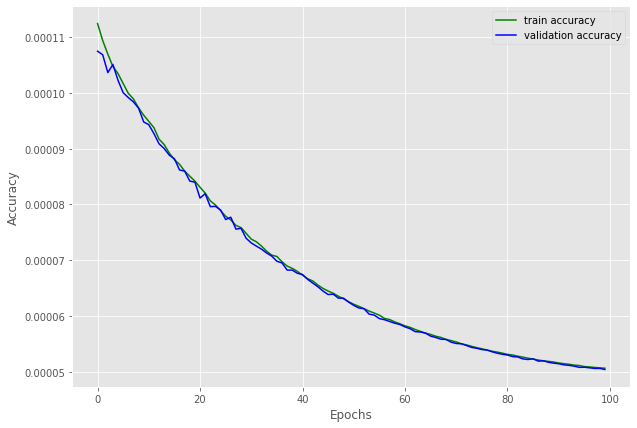

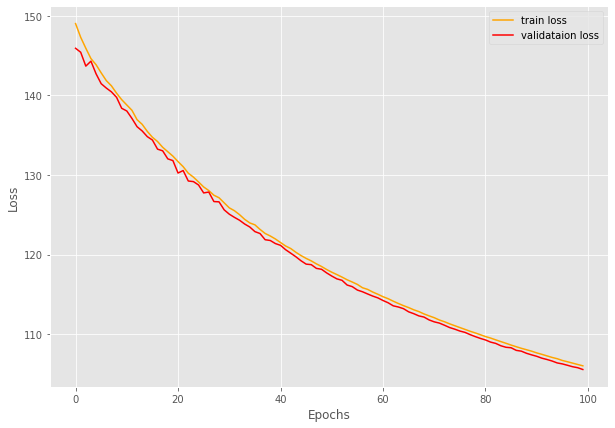

In [ ]:
num_epochs = 100

# lists to keep track of losses and accuracies

for epoch in range(num_epochs):
  print(f"[INFO]: Epoch {epoch+1} of {num_epochs}")

  train_epoch_loss, train_epoch_acc = train_epoch(vae, device, train_loader, optim)
  valid_epoch_loss, valid_epoch_acc = val_epoch(vae, device, valid_loader)

  training_loss.append(train_epoch_loss)
  valid_loss.append(valid_epoch_loss)
  training_acc.append(train_epoch_acc)
  valid_acc.append(valid_epoch_acc)

  print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
  print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
  # save the best model till now if we have the least loss in the current epoch
  
  if valid_epoch_loss < best_valid_loss:
    best_valid_loss = valid_epoch_loss
    save_best_model(
        valid_epoch_loss, epoch, vae, optim
    )
  print('-'*50)
      
  # save the trained model weights for a final time
  #save_model(num_epochs, vae, optim)
  #plt.show()
  # save the loss and accuracy plots

save_plots(training_acc, valid_acc, training_loss, valid_loss)
print('TRAINING COMPLETE')
plt.show()

In [ ]:
test_embeddings_tensor = torch.from_numpy(test_embeddings)
test_encoded = vae.encoder(test_embeddings_tensor, debug=True, Sample=False)

- Input shape: torch.Size([223, 512])
- linear1 output shape: torch.Size([223, 256])
- linear2 output shape: torch.Size([223, 128])
- linear3 output shape: torch.Size([223, 64])
- linear4 (mu) output shape: torch.Size([223, 5])
- linear5 (sigma) output shape: torch.Size([223, 5])
- total output (z) shape: torch.Size([223, 5])


In [ ]:
print(test_embeddings_tensor)

tensor([[-0.0005, -0.0164,  0.0132,  ..., -0.1068, -0.0532,  0.0151],
        [ 0.0393,  0.0321,  0.0221,  ..., -0.0653,  0.0406,  0.0287],
        [-0.0113,  0.0203, -0.0056,  ..., -0.0205,  0.0486, -0.0230],
        ...,
        [-0.0163,  0.0293,  0.0338,  ..., -0.0330,  0.0413, -0.0300],
        [ 0.0132,  0.0073,  0.0389,  ..., -0.0387, -0.0180,  0.0204],
        [-0.0354,  0.0514,  0.0033,  ..., -0.0413,  0.0231,  0.0356]])


In [ ]:
print(test_encoded.shape)
print(test_encoded[-10:])

torch.Size([223, 5])
tensor([[ 0.0340,  0.0229, -0.0746,  0.0435, -0.0827],
        [ 0.0356,  0.0260, -0.0745,  0.0429, -0.0835],
        [ 0.0332,  0.0190, -0.0720,  0.0440, -0.0796],
        [ 0.0354,  0.0200, -0.0731,  0.0436, -0.0843],
        [ 0.0389,  0.0257, -0.0722,  0.0441, -0.0804],
        [ 0.0360,  0.0195, -0.0720,  0.0423, -0.0811],
        [ 0.0363,  0.0236, -0.0743,  0.0400, -0.0825],
        [ 0.0392,  0.0269, -0.0792,  0.0437, -0.0844],
        [ 0.0354,  0.0210, -0.0740,  0.0426, -0.0832],
        [ 0.0367,  0.0245, -0.0778,  0.0428, -0.0841]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

test_cpu = test_encoded.to("cpu")
test_detach = test_cpu.detach().numpy()
X_std = StandardScaler().fit_transform(test_detach)
X_pca = PCA(n_components=3).fit_transform(X_std)

# Now we perform k-means searching for the optimal number of clusters according to the Calinski-Harabasz and elbow scores:

In [ ]:
print(X_pca.shape)
print(X_pca[152])

(223, 3)
[-1.7590678 -1.8136783 -0.6224149]


In [ ]:
#Using clustering to find out how many labels we have in the data (preparing the scenario for cases where the domain has not been provided - Unsupervised learning)
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score as qmetric

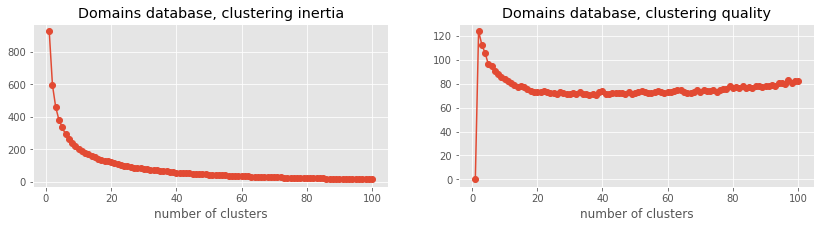

In [ ]:
Nclusters_max = 100
Nrepetitions = 20

qualities = []
inertias = []
models = []

for k in range(1,Nclusters_max+1):
    kmeans = KMeans(n_clusters=k,
                    init='k-means++', n_init=Nrepetitions,
                    max_iter=500, random_state=2)
    kmeans.fit(X_pca)
    models.append(kmeans)
    inertias.append(kmeans.inertia_)
    if k >1:
        qualities.append(qmetric(X_pca, kmeans.labels_))
    else:
        qualities.append(0)

fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(1,Nclusters_max+1), inertias, marker='o')
plt.xlabel('number of clusters')
plt.title('Domains database, clustering inertia')

ax = plt.subplot(1,2,2)
plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('number of clusters')
plt.title('Domains database, clustering quality')
plt.show()

best = pd.Series(qualities).idxmax() # get index for the best model
kmeans = models[best]
n_clusters = kmeans.get_params()['n_clusters']

In [ ]:
kmeans.cluster_centers_

array([[ 1.2177762 , -0.14561966,  0.05416219],
       [-1.2069033 ,  0.1443195 , -0.05367855]], dtype=float32)

In [ ]:
np.unique(kmeans.labels_)

array([0, 1], dtype=int32)

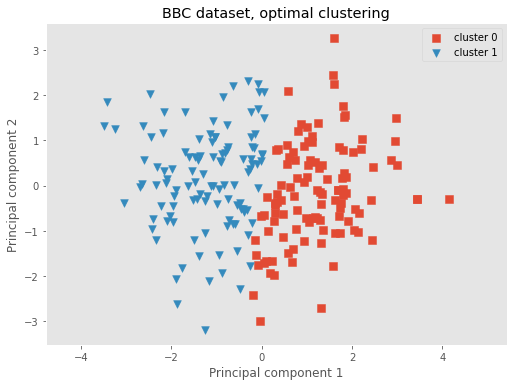

Optimal number of clusters: 2 

- Cluster 0
  49.7758% of total patterns





- Cluster 1
  50.2242% of total patterns







In [ ]:
pcs = [0,1]
n_clusters = 2

cluster_names = ["cluster "+str(c) for c in range(n_clusters)]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for i in range(n_clusters):
    inds = np.where(kmeans.labels_ == i)[0]
    plt.scatter(X_pca[inds, pcs[0]],
                X_pca[inds, pcs[1]],
                s = 60,
                c = colors[i],
                marker = markers[i],
                alpha = 1.0,
                cmap='RdYlGn',
                label = cluster_names[i])

plt.legend(); plt.grid(); plt.axis('equal'); plt.tight_layout()
plt.title('BBC dataset, optimal clustering')
plt.xlabel('Principal component '+str(pcs[0]+1))
plt.ylabel('Principal component '+str(pcs[1]+1))
plt.show()

print('Optimal number of clusters:', n_clusters, '\n')

unique_y = np.unique(y)
ids_clusters = kmeans.labels_
for i in np.unique(ids_clusters):
    inds = (np.where(np.array(ids_clusters) == i))[0]
    print('\033[1m'+'- Cluster %d' % i + '\033[0m')
    print('  %g%% of total patterns' % (100*len(inds)/len(ids_clusters)))
    for real_class in unique_y:
        #print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
      print()

In [ ]:
k = 2
kmeans_model = KMeans(n_clusters = k, init='k-means++', max_iter = 100, n_init=1, random_state=2)
kmeans_model.fit(test_detach)

df_test['cluster'] = kmeans_model.labels_

print(df_test.head())
print(np.unique(kmeans_model.labels_))

#output the result of a text file




                                                   text  cluster
1154  chancellor rallies labour voters gordon brown ...        0
207   blair to face trust issue head on tony blair s...        0
2219  beijingers fume over parking fees choking traf...        1
1682  blair rejects iraq advice calls tony blair has...        0
1122  turkey knocks six zeros off lira turkey is to ...        1
[0 1]


In [ ]:
clusters = df_test.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster' +str(cluster)+ '.csv', 'w', encoding='utf-8')#create tsv file
    data = clusters.get_group(cluster)[['text']] #get text columns
    f.write(data.to_csv(index_label='Id', encoding='utf-8'))#set index to Id
    f.close()

In [ ]:
import string

def clean_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = ' '.join(text.split())  # remove multiple whitespaces
    return text

In [ ]:
#Keyword Extraction with BERT

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
k = 2
stop_words = "english"
n_gram_range = (3, 3)
top_n = 5
cluster = 0
f_text = ''
model_vec = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Extract candidate words/phrases
for f in range(0,k):
    df = pd.read_csv('cluster'+str(cluster)+'.csv')
    print(cluster)
    # Extract candidate words/phrases
    f = df['text'].values.astype(str)
    f_string = ''.join([str(item) for item in f])
    f_string = clean_text(f_string)
    print(type(f_string))
    print(f_string)
    count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([f_string])
    candidates = count.get_feature_names_out()

    #transforming our document and candidates into vectors
    f_embedding = model_vec.encode([f_string])
    candidate_embeddings = model_vec.encode(candidates)

    distances = cosine_similarity(f_embedding, candidate_embeddings)
    keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
    print(keywords)
    f_text = ''
    cluster = cluster+1
    del df

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

0
<class 'str'>
chancellor rallies labour voters gordon brown has issued a rallying cry to supporters warning the stakes are too high to stay at home or protest vote in the next general election. the chancellor said the poll - expected to fall on 5 may - would give a clear and fundamental choice between labour investment and tory cuts. he told his party s spring conference the tories must not be allowed to win. the conservatives and lib dems insisted that voters faced higher taxes and means-testing under labour. to a packed audience at gateshead s sage centre mr brown accused shadow chancellor oliver letwin of plotting cuts that were the equivalent of sacking every teacher gp and nurse in the country. laying into the conservative s record in government he said: i give you this promise - with labour britain will never return to the mistakes of erm and 10% inflation 15% interest rates £3bn in lost reserves 250 000 repossessed one million in negative equity and three million unemployed. n